In [ ]:
%cd '/content/drive/MyDrive/CSE291B00_NLP/Project3/'

/content/drive/MyDrive/CSE291B00_NLP/Project3


In [ ]:
!python main.py --batch-size 128 --data data/PTB_first_2000/ --epochs 10

Building the fields
Namespace(batch_size=128, bos_index=2, buckets=32, clip=5.0, data='data/PTB_first_2000/', delete={':', '', ',', '?', '-NONE-', '``', '!', 'S1', "''", '.', 'TOP'}, dev='data/PTB_first_2000/dev.pid', device='cuda', embed=None, encoder='lstm', eos_index=3, epochs=10, eps=1e-12, equal={'ADVP': 'PRT'}, feat=None, lr=0.002, max_len=None, mbr=True, mu=0.9, n_embed=100, n_labels=71, n_lstm_hidden=200, n_lstm_layers=2, n_tags=45, n_words=3511, nu=0.9, pad_index=0, test='data/PTB_first_2000/test.pid', train='data/PTB_first_2000/train.pid', unk='unk', unk_index=1, weight_decay=1e-05)
Building the model
Model(
  (word_embed): Embedding(3511, 100)
  (tag_embed): Embedding(45, 100)
  (embed_dropout): Dropout(p=0.33, inplace=False)
  (encoder): LSTM(200, 200, num_layers=2, dropout=0.33, bidirectional=True)
  (encoder_dropout): Dropout(p=0.33, inplace=False)
  (mlp_l): MLP(n_in=400, n_out=100, dropout=0.33)
  (mlp_r): MLP(n_in=400, n_out=100, dropout=0.33)
  (feat_biaffine): Biaffi

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

epochs = 10

In [ ]:
with open('valid_loss_gpu.txt','r') as f:
  val = f.read()
valid_loss = val.split()
valid_loss =[float(val) for val in valid_loss]
valid_loss

[1.2683122617832678,
 1.102964520102757,
 0.9975990422707391,
 0.9693620090639345,
 0.9769478318525978,
 0.9787810780217866,
 0.9846721255497947,
 0.9430887224399938,
 1.029090424950144,
 1.0681709566738753]

In [ ]:
with open('metrics_gpu.txt','r') as f:
  val = f.read()
metrics = val.split('\n')
metrics =[val for val in metrics]
metrics = metrics[0:-1]
metrics

['UCM: 10.18% LCM:  8.53% UP: 79.09% UR: 77.99% UF: 78.54% LP: 76.49% LR: 75.43% LF: 75.96%',
 'UCM: 13.88% LCM: 12.65% UP: 81.16% UR: 83.37% UF: 82.25% LP: 79.05% LR: 81.20% LF: 80.11%',
 'UCM: 13.94% LCM: 13.18% UP: 81.37% UR: 85.06% UF: 83.17% LP: 79.33% LR: 82.92% LF: 81.08%',
 'UCM: 17.24% LCM: 15.88% UP: 83.67% UR: 84.77% UF: 84.22% LP: 81.80% LR: 82.87% LF: 82.33%',
 'UCM: 15.65% LCM: 14.41% UP: 82.58% UR: 85.36% UF: 83.95% LP: 80.72% LR: 83.44% LF: 82.06%',
 'UCM: 17.47% LCM: 16.12% UP: 84.52% UR: 85.77% UF: 85.14% LP: 82.73% LR: 83.95% LF: 83.33%',
 'UCM: 18.82% LCM: 17.12% UP: 84.91% UR: 84.49% UF: 84.70% LP: 83.14% LR: 82.72% LF: 82.93%',
 'UCM: 18.82% LCM: 17.76% UP: 83.68% UR: 86.05% UF: 84.85% LP: 81.89% LR: 84.20% LF: 83.03%',
 'UCM: 19.24% LCM: 17.76% UP: 84.70% UR: 85.43% UF: 85.06% LP: 83.05% LR: 83.77% LF: 83.41%',
 'UCM: 19.82% LCM: 18.41% UP: 85.59% UR: 85.46% UF: 85.53% LP: 83.83% LR: 83.70% LF: 83.76%']

In [ ]:
UCM = [float(val.split()[1][:-1]) for val in metrics]
print(UCM)
LCM = [float(val.split()[3][:-1]) for val in metrics]
print(LCM)
UP = [float(val.split()[5][:-1]) for val in metrics]
print(UP)
UR = [float(val.split()[7][:-1]) for val in metrics]
print(UR)
UF = [float(val.split()[9][:-1]) for val in metrics]
print(UF)
LP = [float(val.split()[11][:-1]) for val in metrics]
print(LP)
LR = [float(val.split()[13][:-1]) for val in metrics]
print(LR)
LF = [float(val.split()[15][:-1]) for val in metrics]
LF

[10.18, 13.88, 13.94, 17.24, 15.65, 17.47, 18.82, 18.82, 19.24, 19.82]
[8.53, 12.65, 13.18, 15.88, 14.41, 16.12, 17.12, 17.76, 17.76, 18.41]
[79.09, 81.16, 81.37, 83.67, 82.58, 84.52, 84.91, 83.68, 84.7, 85.59]
[77.99, 83.37, 85.06, 84.77, 85.36, 85.77, 84.49, 86.05, 85.43, 85.46]
[78.54, 82.25, 83.17, 84.22, 83.95, 85.14, 84.7, 84.85, 85.06, 85.53]
[76.49, 79.05, 79.33, 81.8, 80.72, 82.73, 83.14, 81.89, 83.05, 83.83]
[75.43, 81.2, 82.92, 82.87, 83.44, 83.95, 82.72, 84.2, 83.77, 83.7]


[75.96, 80.11, 81.08, 82.33, 82.06, 83.33, 82.93, 83.03, 83.41, 83.76]

In [ ]:
f = open('train_loss_gpu.txt','r')
train_losses = []
while True:
  line = f.readline()[:-2]
  if not line:
    break
  train = line.split()
  train_losses.append([float(val) for val in train])
print(train_losses)
epochs = len(valid_loss)
train_loss = [train_losses[i][-1] for i in range(epochs)]
train_loss

[[9.651740074157715, 3.3641791343688965, 2.2534263134002686, 1.754697322845459, 2.3399391174316406, 1.3489018678665161, 1.4209719896316528, 1.192578911781311, 1.1253350973129272], [1.3022977113723755, 1.0116729736328125, 1.0516091585159302, 0.6073060631752014, 1.283483862876892, 1.3922373056411743, 1.0322983264923096, 1.1391057968139648, 1.456092357635498], [1.159578561782837, 0.6603420972824097, 1.3006640672683716, 0.40848085284233093, 1.3943909406661987, 0.7568867206573486, 0.926418125629425, 0.8416162729263306, 0.6744293570518494], [1.2435601949691772, 0.9523873925209045, 1.2811635732650757, 0.5985895395278931, 1.7315152883529663, 1.2117526531219482, 1.8646049499511719, 0.48920977115631104, 0.8889610171318054], [1.175883412361145, 1.2582627534866333, 1.3935312032699585, 1.0370851755142212, 0.7687855958938599, 0.5873449444770813, 1.265089750289917, 1.079384446144104, 1.004568099975586], [0.6278470754623413, 0.32384198904037476, 0.8660237789154053, 0.9971280694007874, 0.82962805032730

[1.1253350973129272,
 1.456092357635498,
 0.6744293570518494,
 0.8889610171318054,
 1.004568099975586,
 0.540110170841217,
 0.9177541732788086,
 0.6635105013847351,
 0.5657677054405212,
 1.0094506740570068]

In [ ]:
# mean of training per epoch
f = open('train_loss_gpu.txt','r')
train_losses = []
while True:
  line = f.readline()[:-2]
  if not line:
    break
  train = line.split()
  train_losses.append([float(val) for val in train])
print(train_losses)
epochs = len(valid_loss)
train_loss_m = [np.mean(train_losses[i]) for i in range(epochs)]
train_loss_m

[[9.651740074157715, 3.3641791343688965, 2.2534263134002686, 1.754697322845459, 2.3399391174316406, 1.3489018678665161, 1.4209719896316528, 1.192578911781311, 1.1253350973129272], [1.3022977113723755, 1.0116729736328125, 1.0516091585159302, 0.6073060631752014, 1.283483862876892, 1.3922373056411743, 1.0322983264923096, 1.1391057968139648, 1.456092357635498], [1.159578561782837, 0.6603420972824097, 1.3006640672683716, 0.40848085284233093, 1.3943909406661987, 0.7568867206573486, 0.926418125629425, 0.8416162729263306, 0.6744293570518494], [1.2435601949691772, 0.9523873925209045, 1.2811635732650757, 0.5985895395278931, 1.7315152883529663, 1.2117526531219482, 1.8646049499511719, 0.48920977115631104, 0.8889610171318054], [1.175883412361145, 1.2582627534866333, 1.3935312032699585, 1.0370851755142212, 0.7687855958938599, 0.5873449444770813, 1.265089750289917, 1.079384446144104, 1.004568099975586], [0.6278470754623413, 0.32384198904037476, 0.8660237789154053, 0.9971280694007874, 0.82962805032730

[2.7168633143107095,
 1.141789284017351,
 0.9025341106785668,
 1.1401938199996948,
 1.0633261534902785,
 0.7975846197870042,
 0.8474753134780459,
 0.6728173792362213,
 0.8707678450478448,
 0.7659589184655083]

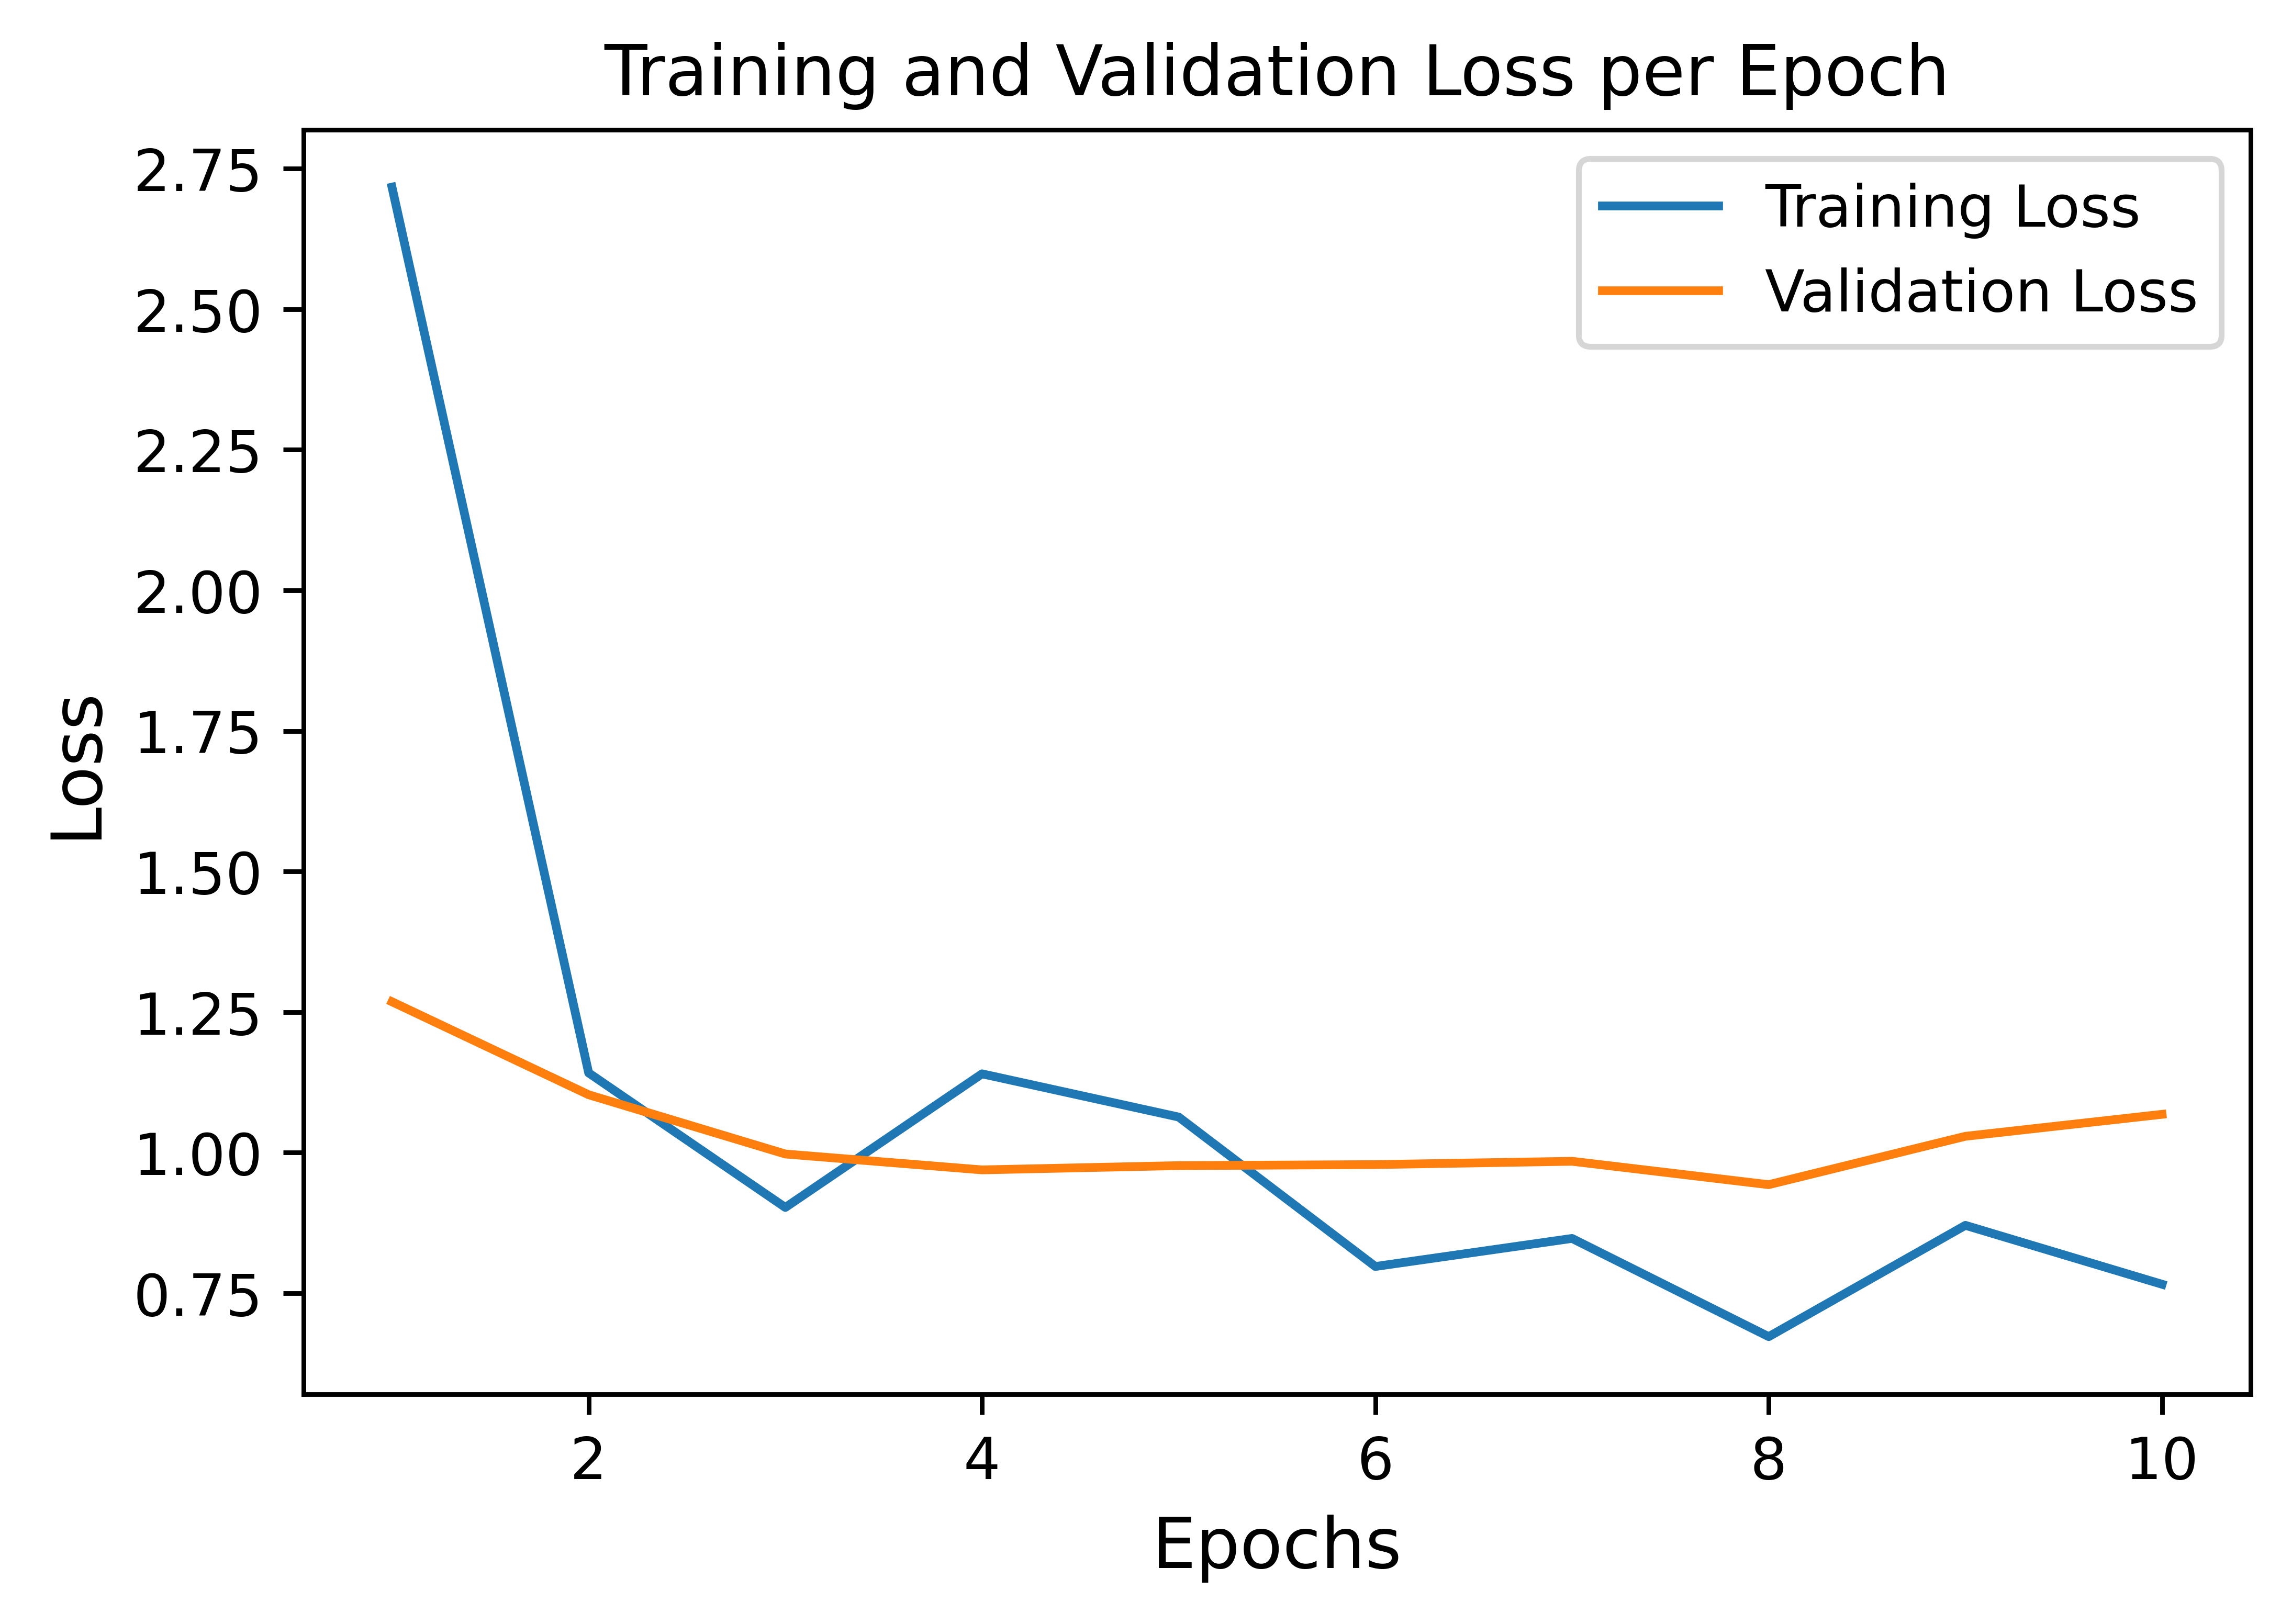

In [ ]:
train_val = [[train_loss_m[i], valid_loss[i]] for i in range(epochs)]
plt.figure(figsize=(6,4), dpi= 800)
plt.plot(np.linspace(1,epochs,epochs).astype(int), train_val)
plt.title('Training and Validation Loss per Epoch', fontsize = 12)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
# plt.ylim((0,3))
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('TrainValLoss_mean_gpu.png', dpi = 800)

In [ ]:
 iter_loss = [val for value in train_losses for val in value]
 iter_loss

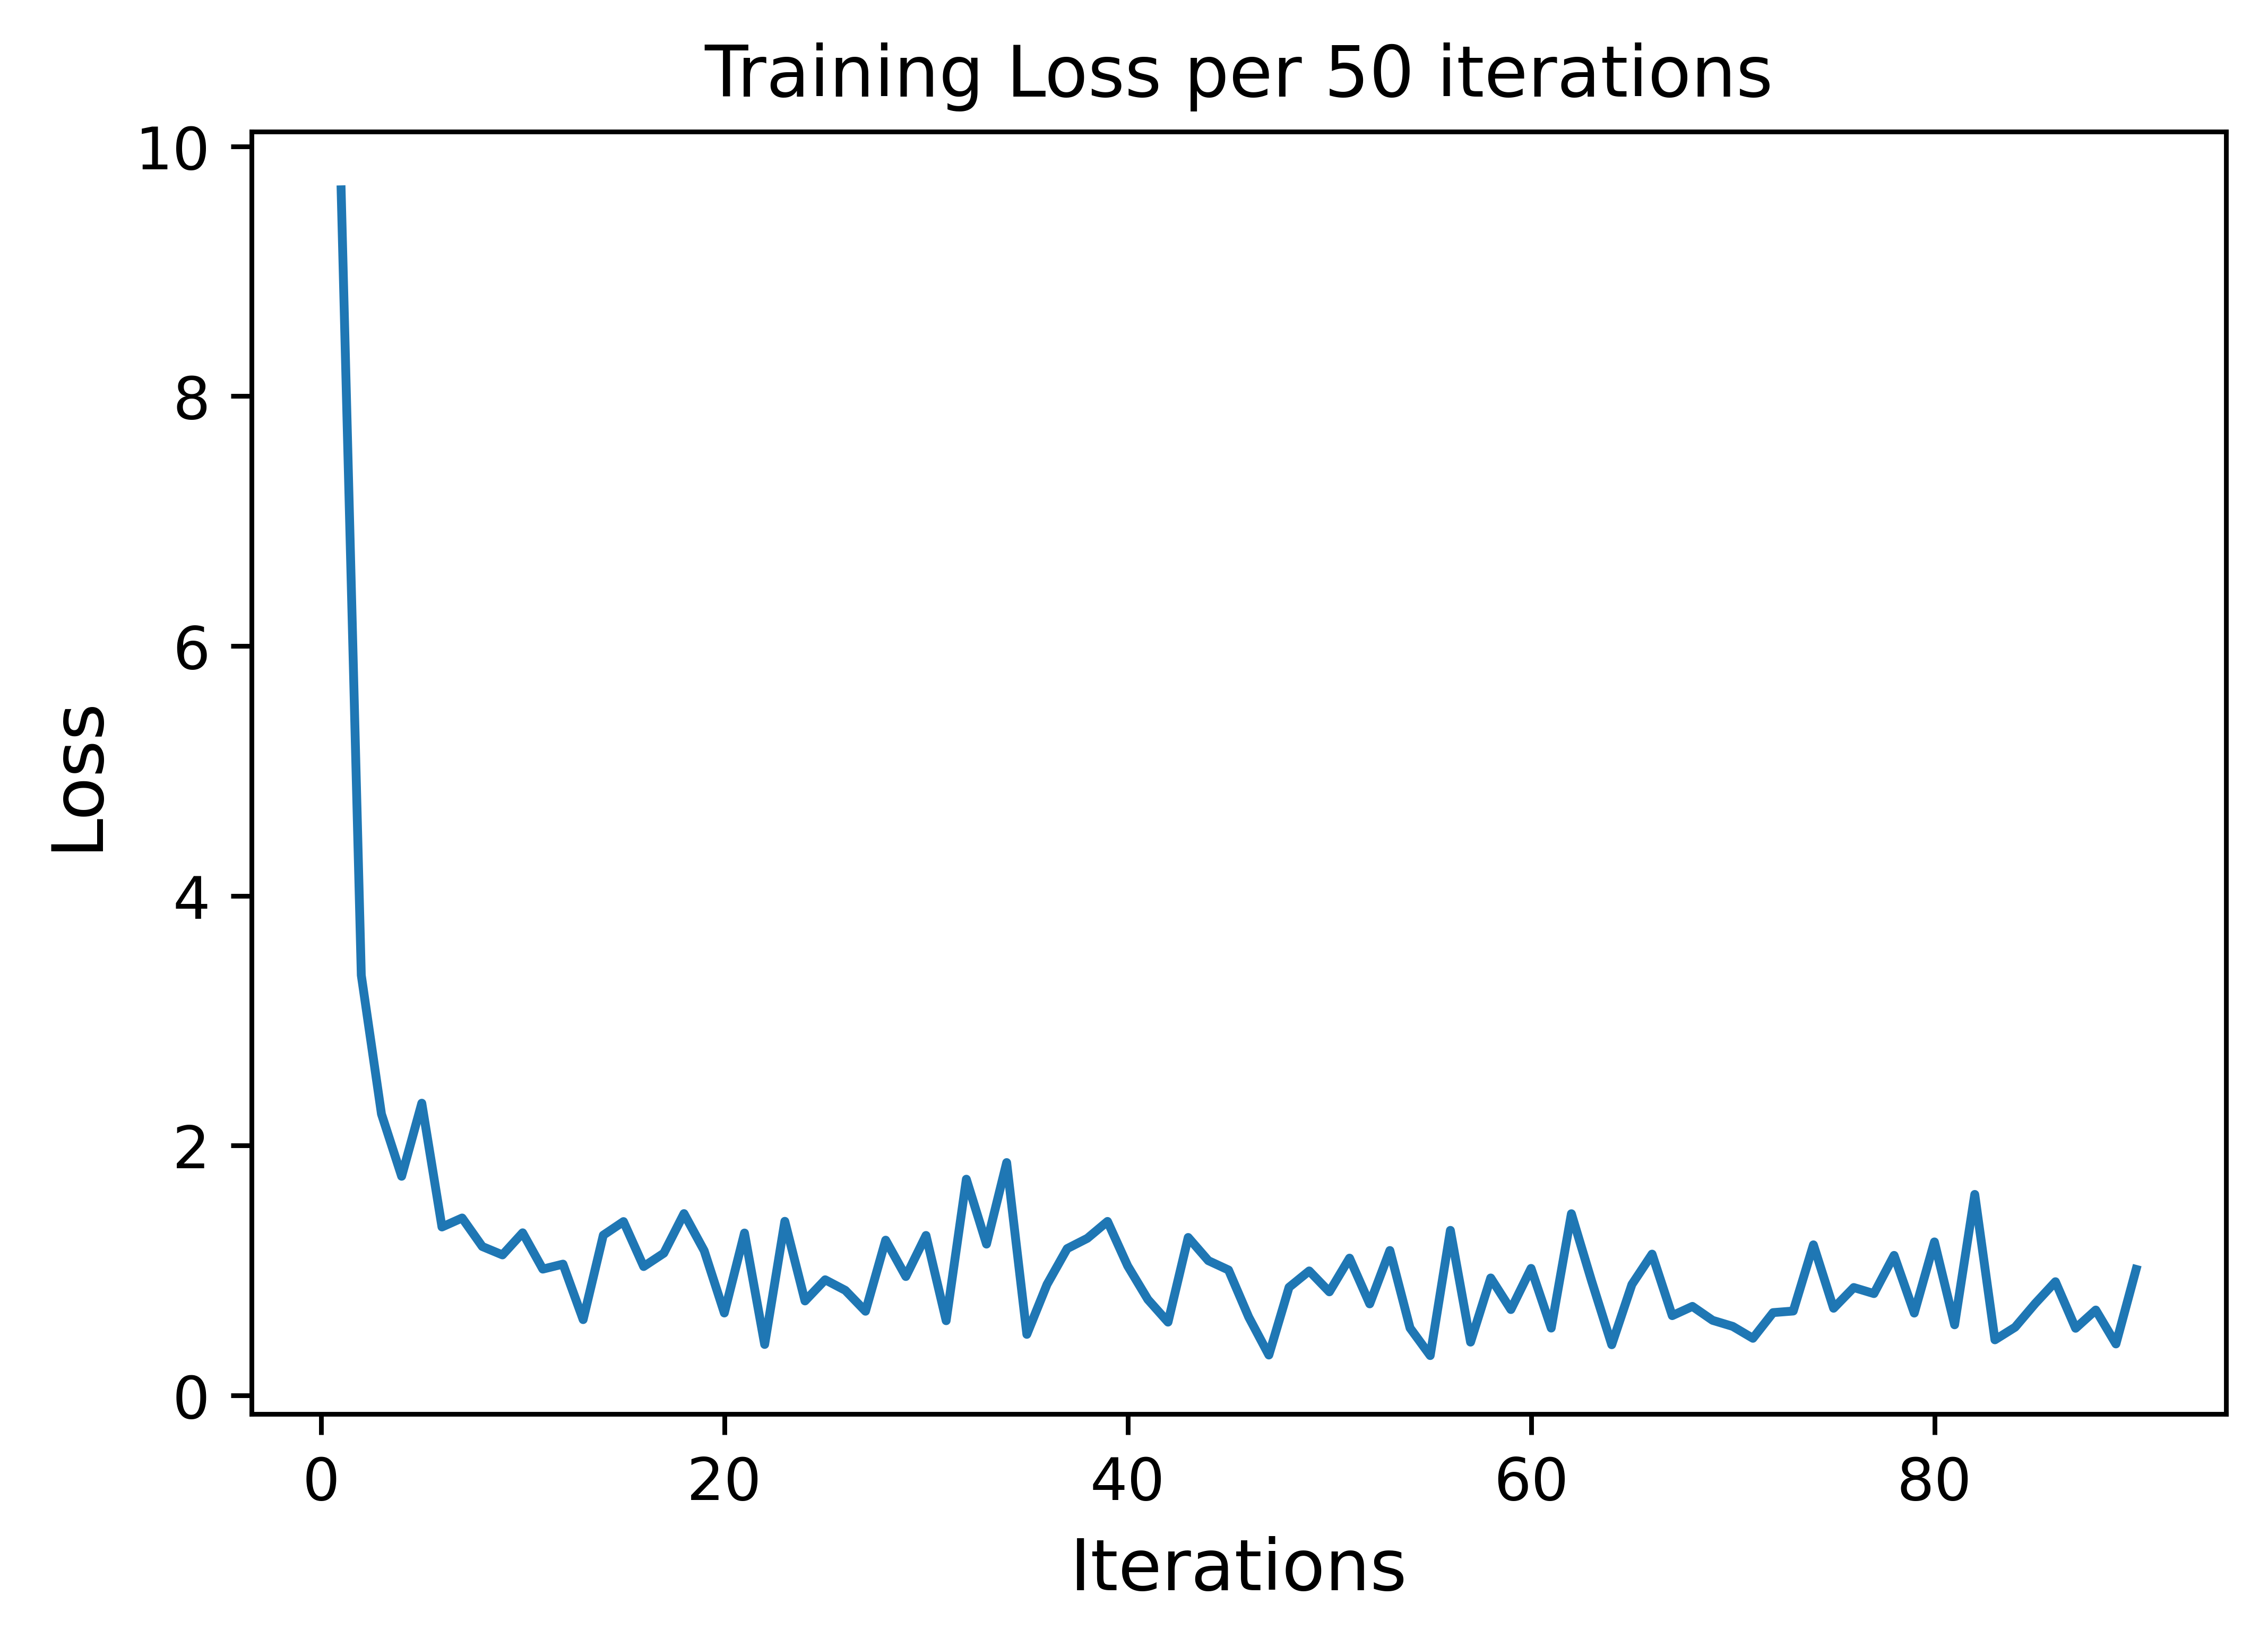

In [ ]:
plt.figure(figsize=(6,4), dpi= 800)
plt.plot(np.linspace(1,len(iter_loss),len(iter_loss)).astype(int), iter_loss)
plt.title('Training Loss per 50 iterations', fontsize = 12)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
# plt.ylim((0,3))
#plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('TrainLoss_perIters_gpu.png', dpi = 800)

In [ ]:
X = np.linspace(1,epochs,epochs)

figure, axis = plt.subplots(2, 4, figsize = (15,5), dpi= 800)
figure.tight_layout()

#plt.figure(dpi = 1200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

axis[0, 0].plot(X, UCM)
axis[0, 0].set_title("Unlabeled Complete Match")

axis[0, 1].plot(X, UP)
axis[0, 1].set_title("Unlabeled Precision")

axis[0, 2].plot(X, UR)
axis[0, 2].set_title("Unlabeled Recall")

axis[0, 3].plot(X, UF)
axis[0, 3].set_title("Unlabeled F1")

axis[1, 0].plot(X, LCM)
axis[1, 0].set_title("Labeled Complete Match")

axis[1, 1].plot(X, LP)
axis[1, 1].set_title("Labeled Precision")

axis[1, 2].plot(X, LR)
axis[1, 2].set_title("Labeled Recall")

axis[1, 3].plot(X, LF)
axis[1, 3].set_title("Labeled F1")

plt.setp(axis[-1, :], xlabel='Epochs')
plt.setp(axis[:, 0], ylabel='Value')
#plt.title('Evaluation Metrics')

plt.savefig('Evaluation_Metrics_gpu.png', dpi=800)

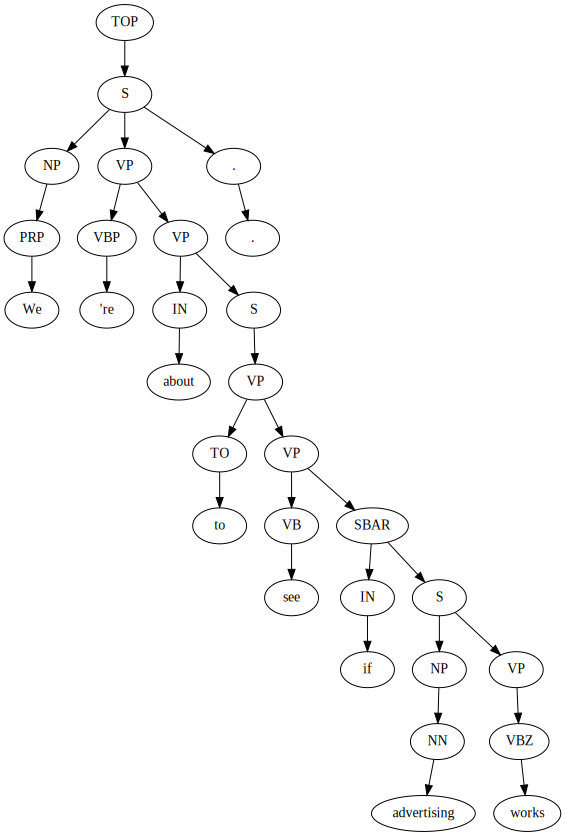

In [ ]:
from node import from_string, draw_tree
l = "((TOP (S (NP (PRP We)) (VP (VBP 're) (VP (IN about) (S (VP (TO to) (VP (VB see) (SBAR (IN if) (S (NP (NN advertising)) (VP (VBZ works))))))))) (. .))))"
t = from_string(l)
draw_tree(t)

In [ ]:
# with LE10 dataset
!python main.py --batch-size 128 --data data/PTB_LE10/ --epochs 10

Building the fields
Namespace(batch_size=128, bos_index=2, buckets=32, clip=5.0, data='data/PTB_LE10/', delete={'``', '', '!', 'S1', 'TOP', '.', ',', '-NONE-', '?', "''", ':'}, dev='data/PTB_LE10/dev.pid', device='cuda', embed=None, encoder='lstm', eos_index=3, epochs=10, eps=1e-12, equal={'ADVP': 'PRT'}, feat=None, lr=0.002, max_len=None, mbr=True, mu=0.9, n_embed=100, n_labels=59, n_lstm_hidden=200, n_lstm_layers=2, n_tags=46, n_words=1331, nu=0.9, pad_index=0, test='data/PTB_LE10/test.pid', train='data/PTB_LE10/train.pid', unk='unk', unk_index=1, weight_decay=1e-05)
Building the model
Model(
  (word_embed): Embedding(1331, 100)
  (tag_embed): Embedding(46, 100)
  (embed_dropout): Dropout(p=0.33, inplace=False)
  (encoder): LSTM(200, 200, num_layers=2, dropout=0.33, bidirectional=True)
  (encoder_dropout): Dropout(p=0.33, inplace=False)
  (mlp_l): MLP(n_in=400, n_out=100, dropout=0.33)
  (mlp_r): MLP(n_in=400, n_out=100, dropout=0.33)
  (feat_biaffine): Biaffine(n_in=100, n_out=59, b